# Digit Recognition with a Feed Forward Neural Network

---

### Import the necessary packages

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(42)

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



import keras
from keras.utils import to_categorical


%matplotlib inline

In [169]:
# 1.- Load the training data (train.csv) from Kaggle
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
# Check the shape
data.shape

(42000, 785)

In [171]:
# 2.- Setup X and y (feature matrix and target vector)
X = data.drop('label', axis=1)
y = data['label'].astype('int')

# 3.- Split X and y into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [172]:
# Check the y-values (the 'labels' column with numbers)
y[:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [173]:
# Reshape the x_train and x_test for a 4-dimensions feed forward neural network
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))#.astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))#.astype('float32')

In [174]:
# Check the shape again (needs to be 4-dimensions)
X_test.shape

(10500, 28, 28, 1)

In [175]:
# 4.- Preprocess your data
# - When dealing with image data, we need to normalize our X by dividing each value by the max value of a pixel (255).
X_train /= 255
X_test /= 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# - Since this is a multiclass classification problem, keras needs y to be a one-hot encoded matrix
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [176]:
# Check the one-hot encoded matrix
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# The (Feed Forward) Model 

In [177]:
# 5.- Create our network
# - Remember that for multi-class classification we need a softamx activation function on the output layer.
# - We should consider using regularization or dropout to improve performance.

from keras import regularizers
model = Sequential()
model.add(Flatten())

In [178]:

model.add(Dense(128, 
                #input_dim=n_input,
                activation = 'relu',
                kernel_regularizer=regularizers.l1(0.000001)))

model.add(Dense(32, 
                activation = 'relu',
                kernel_regularizer=regularizers.l1(0.000001)))

model.add(Dense(10,
                activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [179]:
history = model.fit(X_train,
                    y_train, 
                    batch_size=300,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/100
31500/31500 [==============================] - 1s 39us/sample - loss: 1.9202 - accuracy: 0.5253 - val_loss: 1.2694 - val_accuracy: 0.7024
Epoch 2/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.8821 - accuracy: 0.7928 - val_loss: 0.6477 - val_accuracy: 0.8422
Epoch 3/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.5486 - accuracy: 0.8589 - val_loss: 0.4856 - val_accuracy: 0.8724
Epoch 4/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.4388 - accuracy: 0.8822 - val_loss: 0.4166 - val_accuracy: 0.8834
Epoch 5/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.3864 - accuracy: 0.8933 - val_loss: 0.3776 - val_accuracy: 0.8950
Epoch 6/100
31500/31500 [==============================] - 0s 10us/sample - loss: 0.3532 - accuracy: 0.9019 - val_loss: 0.3572 - val_accuracy: 0.8983
Epoch 7/100
31500/31500 [=========================

Epoch 55/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.0879 - accuracy: 0.9807 - val_loss: 0.1565 - val_accuracy: 0.9599
Epoch 56/100
31500/31500 [==============================] - 0s 12us/sample - loss: 0.0863 - accuracy: 0.9811 - val_loss: 0.1544 - val_accuracy: 0.9600
Epoch 57/100
31500/31500 [==============================] - 0s 12us/sample - loss: 0.0846 - accuracy: 0.9824 - val_loss: 0.1540 - val_accuracy: 0.9614
Epoch 58/100
31500/31500 [==============================] - 0s 11us/sample - loss: 0.0823 - accuracy: 0.9825 - val_loss: 0.1543 - val_accuracy: 0.9608
Epoch 59/100
31500/31500 [==============================] - 0s 15us/sample - loss: 0.0807 - accuracy: 0.9825 - val_loss: 0.1540 - val_accuracy: 0.9608
Epoch 60/100
31500/31500 [==============================] - 0s 14us/sample - loss: 0.0786 - accuracy: 0.9832 - val_loss: 0.1520 - val_accuracy: 0.9610
Epoch 61/100
31500/31500 [==============================] - 0s 14us/sample - loss: 0.0774 - ac

In [180]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dense_13 (Dense)             multiple                  4128      
_________________________________________________________________
dense_14 (Dense)             multiple                  330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


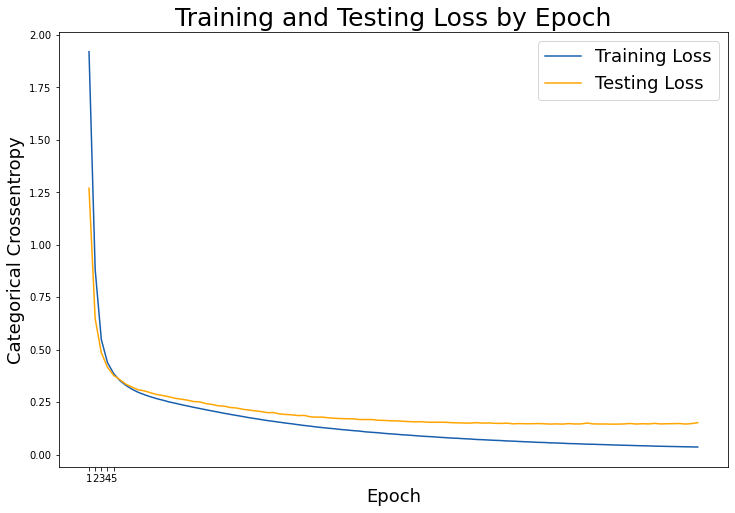

In [181]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [182]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

10500/10500 [==============================] - 0s 37us/sample - loss: 0.1520 - accuracy: 0.9645


In [183]:
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 0.15202197279745625
accuracy: 0.9644761681556702


# Preparing Submission (for Kaggle competition)

In [184]:
# We will now use our feed forward neural network to predict the labels on our 'test' dataset
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
# Check the shape
test.shape

(28000, 784)

In [186]:
# We get every column on the tes dataset
text_X = test[test.columns]

In [187]:
text_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
text_X.shape

(28000, 784)

In [189]:
# Now we get an array of every column on the tes dataset
test_array = np.array(text_X)

In [190]:
test_array.shape

(28000, 784)

In [191]:
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [192]:
test_array[:10].argmax(axis=1)

array([536, 575, 186, 543, 436, 356, 127, 405, 289, 125])

## Predicts

In [193]:
# Predictions of our feed forward neural network model
predicts = model.predict(test_array).argmax(axis=1)

In [194]:
# Check that the predicts are between 0 and 9
predicts[:10]

array([2, 0, 3, 7, 3, 7, 0, 3, 0, 3])

In [195]:
# Check that the predictions are only 1 column
predicts.shape

(28000,)

In [196]:
# We start preparing the format for the submission to Kaggle
submission = pd.DataFrame(test.index+1)

In [197]:
submission['Label'] = predicts

In [198]:
# We check the format of the predictions by looking at some of the rows
submission.tail()

,0,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [199]:
# We remane the column named '0' as 'ImageId'
submission.rename(columns={0: 'ImageId'}, inplace=True)

In [200]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,3
3,4,7
4,5,3


# Submission

In [201]:
# Finally, we make our submission 
submission.to_csv('Feed_Forward_model.csv', index=False)

In [202]:
# Check the sabe (should be (28000,2))
submission.shape

(28000, 2)

In [203]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,3
3,4,7
4,5,3


# Done!